In [107]:
import lightkurve as lk
%matplotlib inline
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.close_figures = True

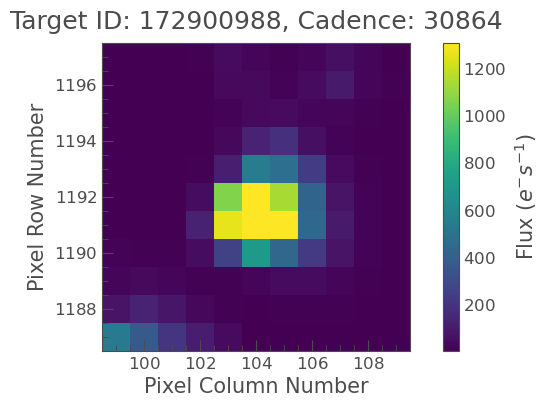

In [25]:
from lightkurve import TessTargetPixelFile
tpf = TessTargetPixelFile(tpf_path)
tpf_path = ("D:\\İndirilenler\\MAST_2025-08-20T1131\\MAST_2025-08-20T1131\\HLSP\\hlsp_tess-spoc_tess_phot_0000000172900988-s0021_tess_v1_tp\\hlsp_tess-spoc_tess_phot_0000000172900988-s0021_tess_v1_tp.fits")
tpf.plot()
plt.show()


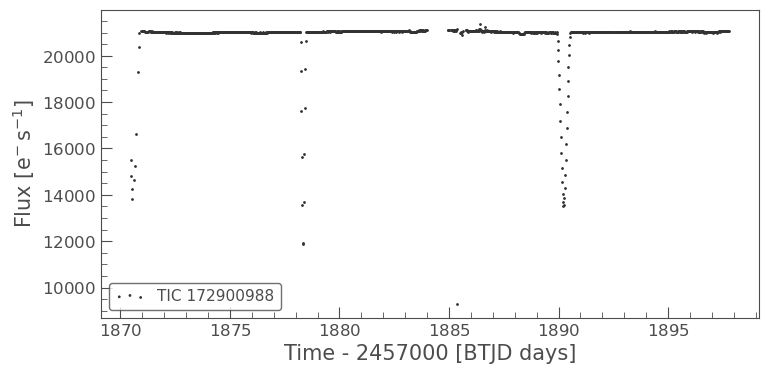

In [20]:
lc = tpf.to_lightcurve()
lc.scatter();
import matplotlib.pyplot as plt
plt.show()

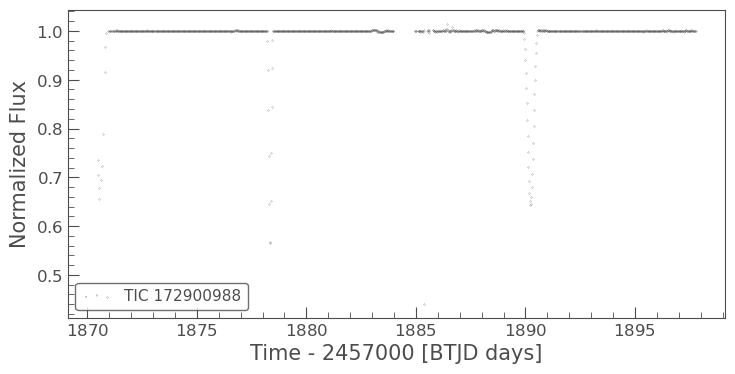

In [21]:
flat_lc = lc.flatten()
flat_lc.scatter(s=0.1);
plt.show()

In [29]:
from lightkurve import search_targetpixelfile
pixelfile = search_targetpixelfile("KIC 8462852", quarter=16).download(quality_bitmask='hardest');

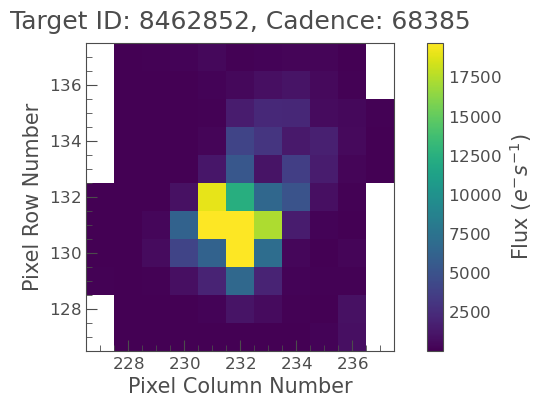

In [35]:
pixelfile.plot(frame=1000);
plt.show()

In [36]:
lc = pixelfile.to_lightcurve(aperture_mask='all'); #piksel dosyasını alarak ışık eğrisine dönüştürür

In [37]:
lc

time,flux,flux_err,centroid_col,centroid_row,cadenceno,quality
,electron / s,electron / s,pix,pix,,
Time,float32,float32,float64,float64,int32,int32
1472.1177793449679,258645.03125,18.723051071166992,231.9673225173918,131.14635857005212,66713,0
1472.1382122338982,258660.046875,18.72334861755371,231.9671381956879,131.1455329599996,66714,0
1472.1586449230672,258690.078125,18.723417282104492,231.96697751093495,131.14547901637522,66715,0
1472.1790778124705,258683.328125,18.72397232055664,231.96678360583206,131.14500604059887,66716,0
1472.1995106019822,258655.40625,18.723506927490234,231.96657673426097,131.14489915411463,66717,0
1472.2199432917332,258663.15625,18.723569869995117,231.96699753628025,131.14502413754656,66718,0
1472.2403761816604,258686.71875,18.724145889282227,231.96669495657952,131.14451785560516,66719,0
1472.2608089718124,258663.28125,18.724172592163086,231.96668273644525,131.14450988662415,66720,0


In [38]:
lc.time, lc.flux

(<Time object: scale='tdb' format='bkjd' value=[1472.11777934 1472.13821223 1472.15864492 ... 1557.89718798 1557.9380561
  1557.95849016]>,
 <Quantity [258645.03, 258660.05, 258690.08, ..., 258929.86, 258884.66,
            258865.6 ] electron / s>)

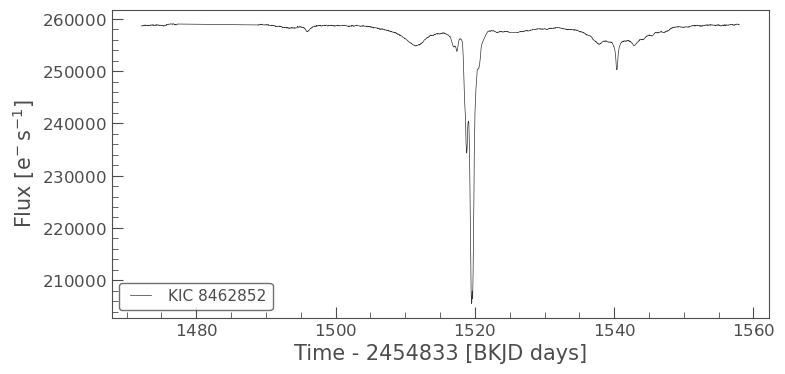

In [41]:
lc.plot();
plt.show()

In [78]:
pixelFile = search_targetpixelfile('KIC 6922244', quarter=4).download_all()

In [85]:
from lightkurve import search_targetpixelfile
import matplotlib.pyplot as plt

# 1. Arama yap
search_result = search_targetpixelfile('KIC 6922244', author="Kepler", cadence="long", quarter=4)
print(f"Arama sonucu: {len(search_result)} dosya bulundu")

# 2. İndir (download_all() DEĞİL, download())
tpf = search_result.download()  # Tek dosya indir
print(f"İndirilen dosya: {type(tpf)}")

# 3. Light curve oluştur
lc = tpf.to_lightcurve(aperture_mask=tpf.pipeline_mask)
print(f"Light curve oluşturuldu: {len(lc.time)} veri noktası")


Arama sonucu: 1 dosya bulundu
İndirilen dosya: <class 'lightkurve.targetpixelfile.KeplerTargetPixelFile'>
Light curve oluşturuldu: 4116 veri noktası


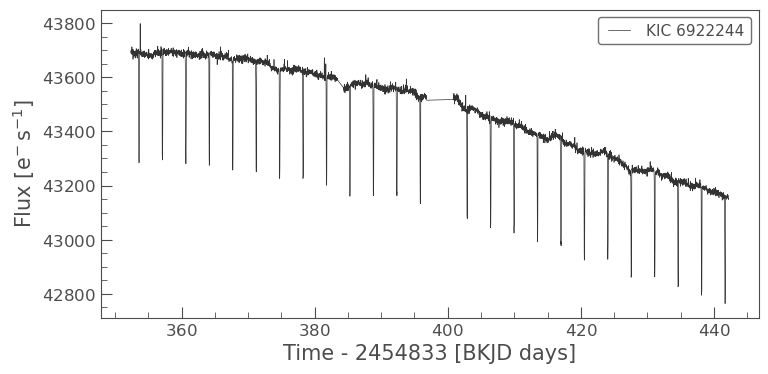

In [86]:
lc.plot();
plt.show()

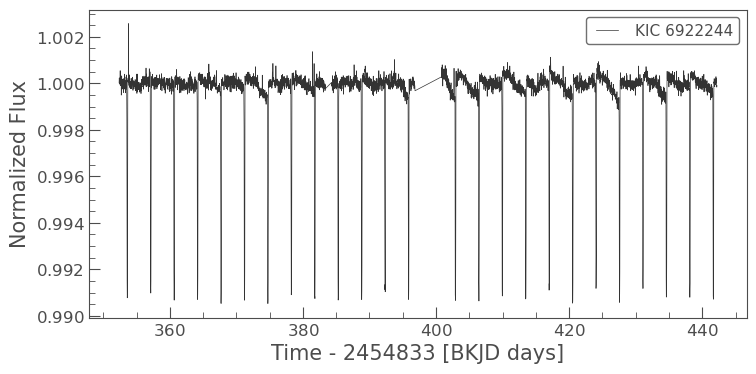

In [87]:
flat_lc = lc.flatten(window_length=401)
flat_lc.plot()
plt.show()

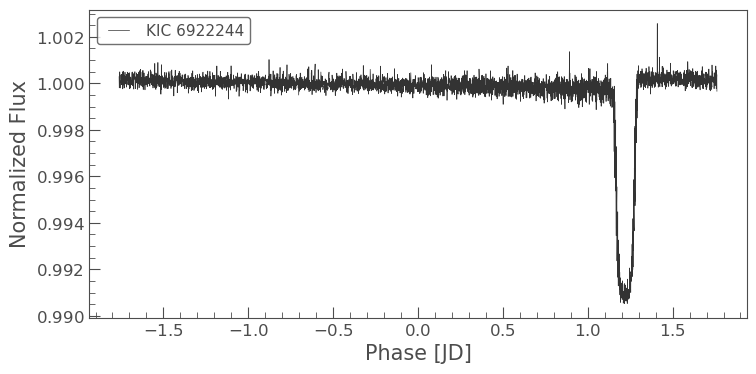

In [139]:
folded_lc = flat_lc.fold(period=3.523)
folded_lc.plot()
plt.show()

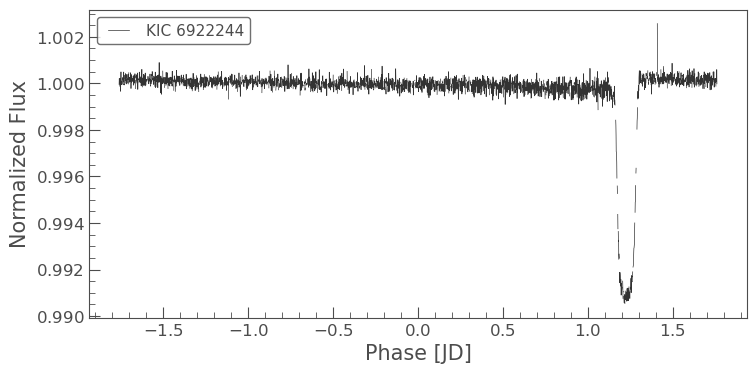

In [130]:
binned_lc = folded_lc.bin(time_bin_size=0.001)
binned_lc.plot()
plt.show()

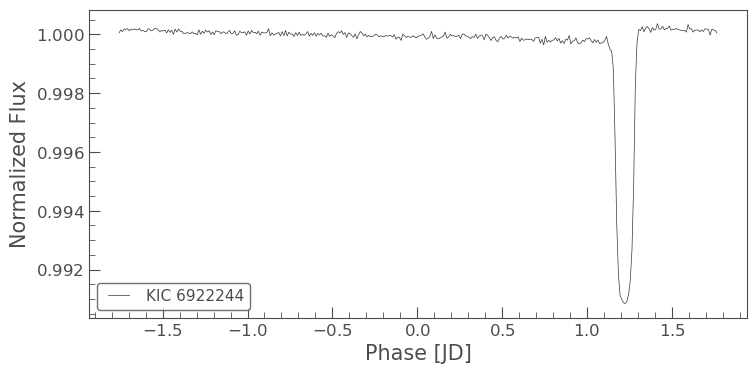

In [138]:
lc.remove_nans().flatten(window_length=401).fold(period=3.523).bin(time_bin_size=0.01).plot();  #bin farkı
plt.show()

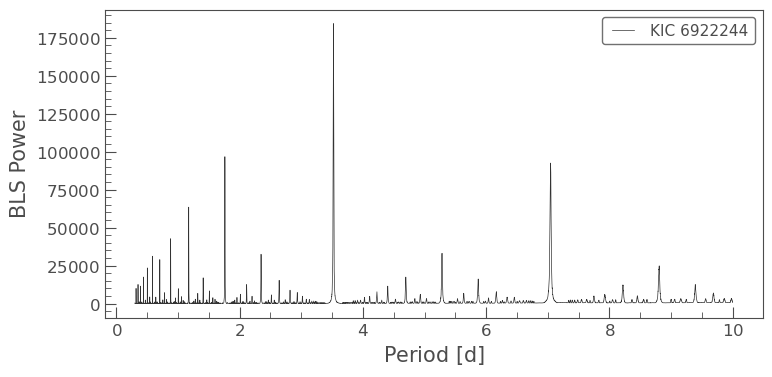

In [136]:
#periyodun 3.523 olduğunu nasıl buluruz?

import numpy as np
periodogram = flat_lc.to_periodogram(
    method="bls", 
    period=np.arange(0.3, 10, 0.001),
    duration=0.1  # hata verdiği için 0.3 ten küçük bir değer girildi
)
periodogram.plot()
plt.show()

In [137]:
best_fit_period = periodogram.period_at_max_power
print('Best fit period: {:.5f}'.format(best_fit_period)) #max periyodu verdi.

Best fit period: 3.52300 d


In [140]:
from lightkurve import search_targetpixelfile
search_result = lk.search_targetpixelfile('Pi Mensae', mission='TESS', sector=1)
tpf = search_result.download(quality_bitmask='default')

D:\anaconda\envs\simulation\Lib\site-packages\lightkurve\search.py:424: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


In [142]:
tpf.mission
tpf.targetid 

261136679

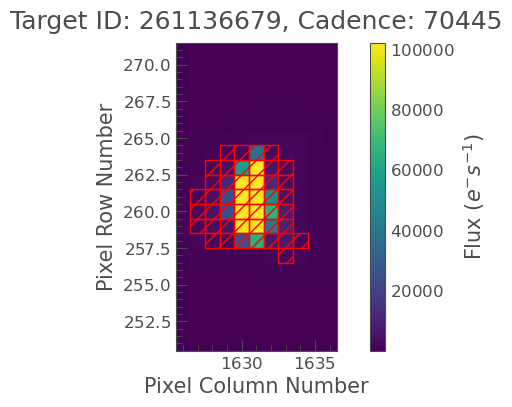

In [143]:
tpf.plot(aperture_mask=tpf.pipeline_mask)
plt.show()

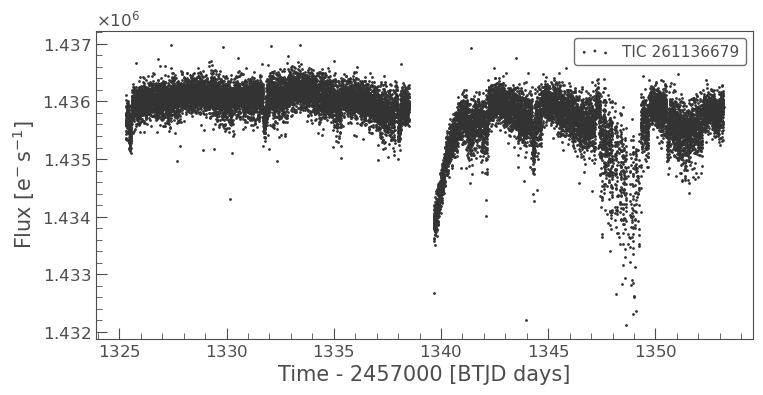

In [144]:
lc = tpf.to_lightcurve()  #pikseli ışık eğrisine dönüştürme
lc.scatter()
plt.show()

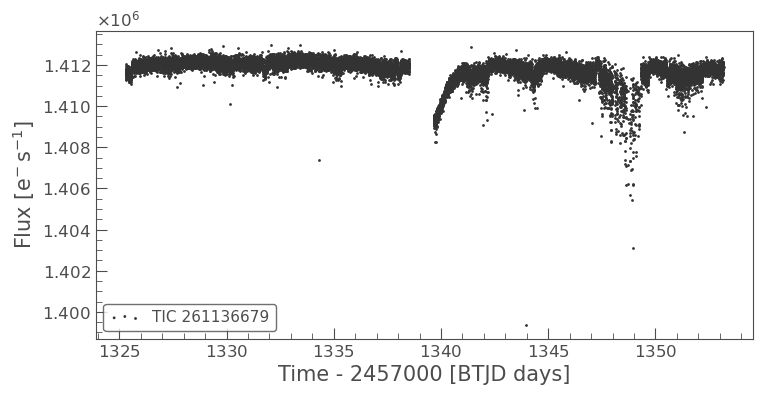

In [216]:
aperture_mask = tpf.create_threshold_mask(threshold=10)
lc = tpf.to_lightcurve(aperture_mask=aperture_mask)
lc.scatter()
plt.show()

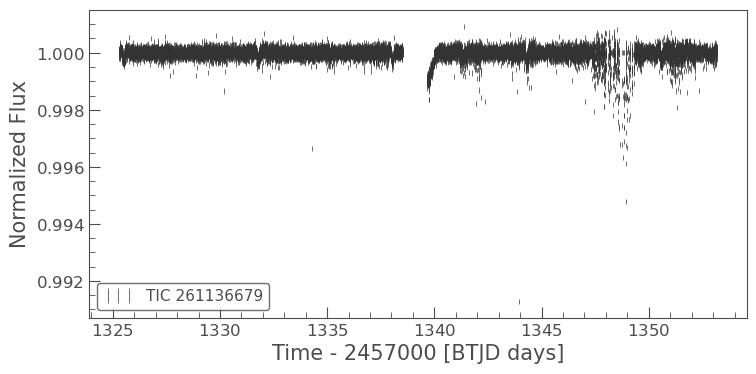

In [217]:
flat_lc = lc.flatten(window_length=1001)
flat_lc.errorbar()
plt.show()

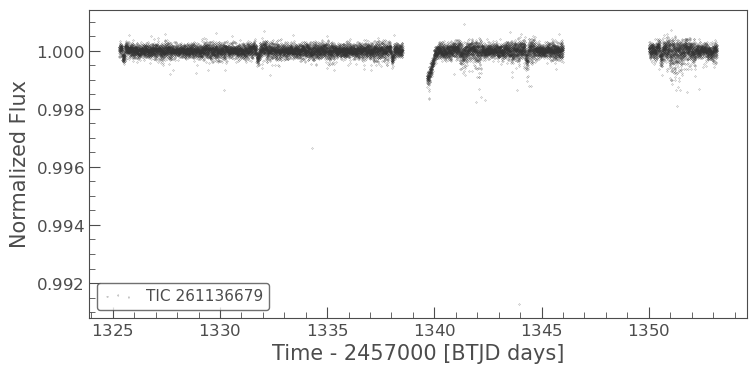

In [215]:
mask = (flat_lc.time.value < 1346) | (flat_lc.time.value > 1350)
masked_lc = flat_lc[mask]
masked_lc.scatter(s=0.1)
plt.show()

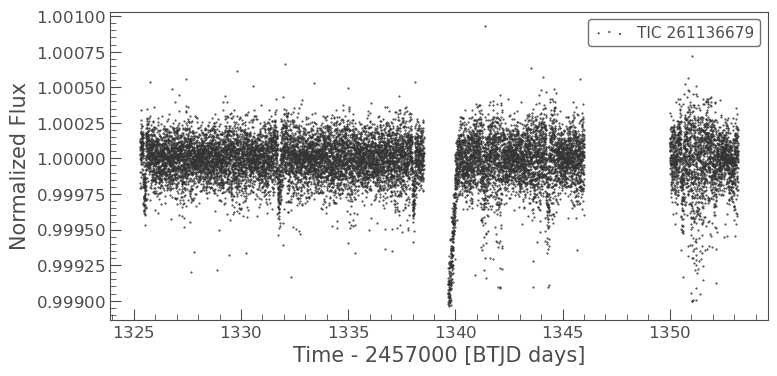

In [218]:
clipped_lc = masked_lc.remove_outliers(sigma=6)
clipped_lc.scatter(s=1)
plt.show()

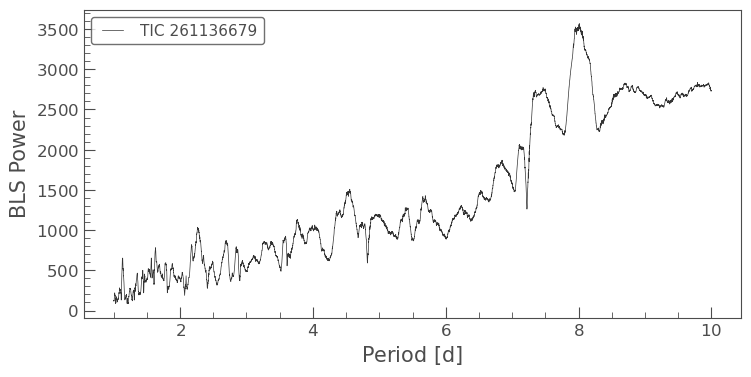

In [219]:
import numpy as np
periodogram = clipped_lc.to_periodogram(method="bls", period=np.arange(1, 10, 0.001))
periodogram.plot()
plt.show()

In [220]:
best_fit_period = periodogram.period_at_max_power
print('Best fit period: {:.3f}'.format(best_fit_period))

Best fit period: 8.010 d


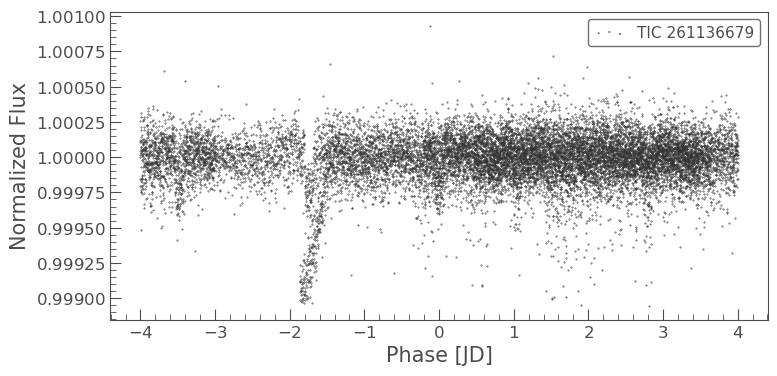

In [192]:
folded_lc = clipped_lc.fold(period=8.01, epoch_time=1325.504)
folded_lc.scatter(s=0.5)
plt.show()

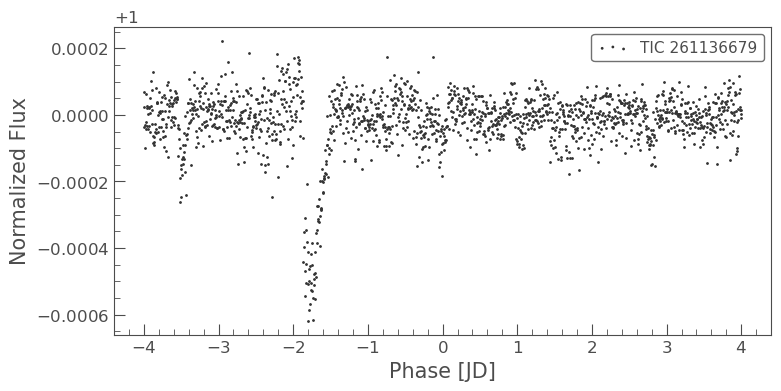

In [202]:
binned_lc = folded_lc.bin(time_bin_size=0.005) 
binned_lc.scatter()
plt.show()